In [1]:
# Data Manipulation
import pandas as pd
import numpy as np
import regex as re
import random
import string
import glob

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

# Feature Engineering
import nltk
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# Data Splitting
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

# Model Building 
from sklearn.pipeline import Pipeline

# Models
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Evaluation Metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score as asc
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('filteredRecords2.csv')
df.head()

,text,label
0,kate whitney startled kate idea came know came...,A
1,hollow hand sherlock holmes sat whistle jove p...,A
2,quite bulky remained might shown grip much fee...,A
3,late sherlock holmes returned came back alone ...,A
4,day hour likely crony landlady sherlock holmes...,A


# Running Champion Model

In [3]:
X_train, X_test, y_train, y_test = train_test_split(df.text, df.label, test_size=0.2, random_state = 42)

In [4]:
pipeline_champion= Pipeline([('Bow',CountVectorizer()),
                             ('tf-idf',TfidfTransformer()),
                            ('RFC',RandomForestClassifier(n_jobs=-1,random_state = 21))])
pipeline_champion.fit(X_train,y_train)
value = cross_val_score(pipeline_champion,X_test,y_test, cv =10,scoring="accuracy")
print(np.mean(value))

0.7150000000000001


In [5]:
%%time
RandomForest_grid = {"RFC__n_estimators": np.arange(10, 100, 10),
           "RFC__max_depth": [None, 3, 5, 10],
           "RFC__min_samples_split": np.arange(2, 20, 2),
           "RFC__min_samples_leaf": np.arange(1, 20, 2),
           "RFC__max_features": [0.5, 1, "sqrt", "auto"]}
RFC = RandomizedSearchCV(pipeline_champion,
                              param_distributions=RandomForest_grid,
                              n_iter=10,
                              cv=10,
                              verbose=True)
RFC.fit(X_train, y_train)

<IPython.core.display.Javascript object>

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Wall time: 13.8 s


RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('Bow', CountVectorizer()),
                                             ('tf-idf', TfidfTransformer()),
                                             ('RFC',
                                              RandomForestClassifier(n_jobs=-1,
                                                                     random_state=21))]),
                   param_distributions={'RFC__max_depth': [None, 3, 5, 10],
                                        'RFC__max_features': [0.5, 1, 'sqrt',
                                                              'auto'],
                                        'RFC__min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'RFC__min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'RFC__n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [6]:
RFC.best_params_

{'RFC__n_estimators': 80,
 'RFC__min_samples_split': 6,
 'RFC__min_samples_leaf': 5,
 'RFC__max_features': 'auto',
 'RFC__max_depth': 10}

In [7]:
RFC.score(X_test, y_test)

0.815

In [8]:
testPreds = RFC.predict(X_test) 

In [9]:
testPreds

array(['C', 'D', 'D', 'D', 'C', 'C', 'D', 'C', 'E', 'A', 'E', 'A', 'D',
       'E', 'E', 'E', 'A', 'E', 'D', 'B', 'C', 'A', 'B', 'E', 'A', 'A',
       'A', 'E', 'E', 'E', 'B', 'A', 'E', 'C', 'B', 'A', 'A', 'E', 'E',
       'A', 'A', 'A', 'E', 'E', 'B', 'B', 'E', 'D', 'C', 'E', 'C', 'E',
       'A', 'C', 'A', 'A', 'D', 'A', 'B', 'E', 'C', 'A', 'E', 'A', 'D',
       'D', 'D', 'E', 'A', 'C', 'A', 'C', 'C', 'D', 'B', 'B', 'D', 'A',
       'C', 'B', 'D', 'C', 'B', 'A', 'B', 'C', 'E', 'D', 'D', 'B', 'B',
       'C', 'C', 'A', 'D', 'C', 'A', 'A', 'A', 'E', 'D', 'A', 'E', 'B',
       'A', 'D', 'C', 'E', 'A', 'E', 'C', 'E', 'E', 'E', 'A', 'A', 'A',
       'E', 'C', 'A', 'E', 'C', 'E', 'B', 'B', 'C', 'C', 'A', 'E', 'E',
       'C', 'E', 'A', 'E', 'C', 'A', 'A', 'B', 'A', 'A', 'A', 'B', 'D',
       'B', 'E', 'E', 'E', 'B', 'E', 'A', 'D', 'A', 'E', 'C', 'E', 'C',
       'A', 'D', 'A', 'E', 'C', 'D', 'D', 'A', 'E', 'D', 'C', 'D', 'A',
       'A', 'B', 'C', 'A', 'A', 'C', 'B', 'B', 'A', 'E', 'D', 'D

In [10]:
df_test = pd.DataFrame(X_test.copy())
df_test['true'] = y_test
df_test['pred'] = testPreds
df_test.to_csv('test_res.csv', index = False)
df_test = pd.read_csv('test_res.csv')
df_test['res'] = df_test['true'] == df_test['pred']
df_test.head()

,text,true,pred,res
0,well rest sex word beware especially weeps for...,C,C,True
1,sure cynthia hesitated moment plucking grass t...,D,D,True
2,explanation quite simple intrigue friend audib...,D,D,True
3,styles mr wells told going upstairs locked des...,D,D,True
4,let theory accident stand broke looking keenly...,C,C,True


# Dist Plots of True Preds vs False Preds of book A

In [11]:
true = ''
for txt in df_test.text[(df_test.res == True) & (df_test.true == 'A')]:
    true += ' '+ txt

false = ''
for txt in df_test.text[(df_test.res == False) & (df_test.true == 'A')]:
    false += ' '+txt

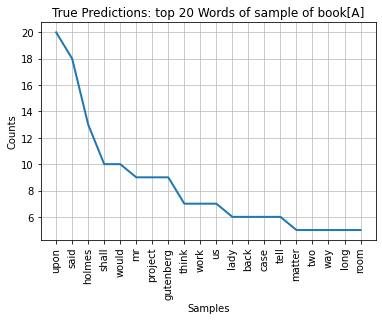

In [12]:
fdist = FreqDist(nltk.word_tokenize(true))
fdist.plot(20,cumulative=False,title='True Predictions: top 20 Words of sample of book[A]')
plt.show()

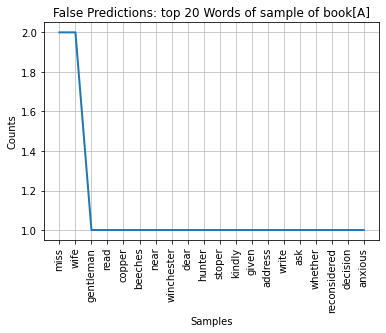

In [13]:
fdist = FreqDist(nltk.word_tokenize(false))
fdist.plot(20,cumulative=False,title='False Predictions: top 20 Words of sample of book[A]')
plt.show()

# Dist Plots of True Preds vs False Preds of book B

In [14]:
true = ''
for txt in df_test.text[(df_test.res == True) & (df_test.true == 'B')]:
    true += ' '+ txt

false = ''
for txt in df_test.text[(df_test.res == False) & (df_test.true == 'B')]:
    false += ' '+txt

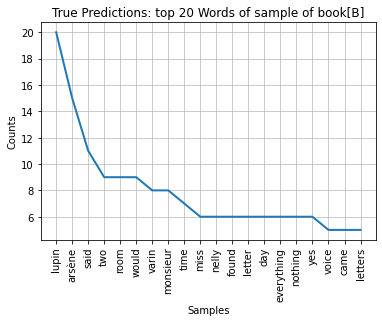

In [15]:
fdist = FreqDist(nltk.word_tokenize(true))
fdist.plot(20,cumulative=False,title='True Predictions: top 20 Words of sample of book[B]')
plt.show()

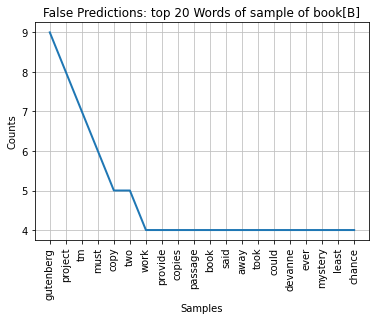

In [16]:
fdist = FreqDist(nltk.word_tokenize(false))
fdist.plot(20,cumulative=False,title='False Predictions: top 20 Words of sample of book[B]')
plt.show()

# Dist Plots of True Preds vs False Preds of book C

In [17]:
true = ''
for txt in df_test.text[(df_test.res == True) & (df_test.true == 'C')]:
    true += ' '+ txt

false = ''
for txt in df_test.text[(df_test.res == False) & (df_test.true == 'C')]:
    false += ' '+txt

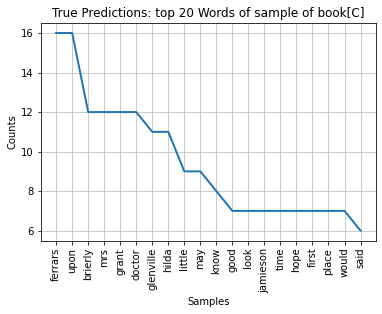

In [18]:
fdist = FreqDist(nltk.word_tokenize(true))
fdist.plot(20,cumulative=False,title='True Predictions: top 20 Words of sample of book[C]')
plt.show()

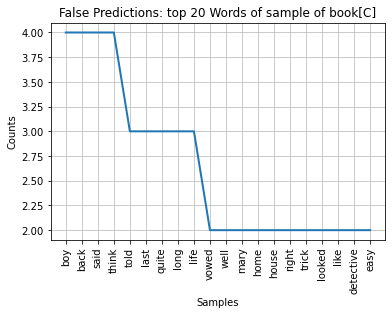

In [19]:
fdist = FreqDist(nltk.word_tokenize(false))
fdist.plot(20,cumulative=False,title='False Predictions: top 20 Words of sample of book[C]')
plt.show()

# Dist Plots of True Preds vs False Preds of book D

In [20]:
true = ''
for txt in df_test.text[(df_test.res == True) & (df_test.true == 'D')]:
    true += ' '+ txt

false = ''
for txt in df_test.text[(df_test.res == False) & (df_test.true == 'D')]:
    false += ' '+txt

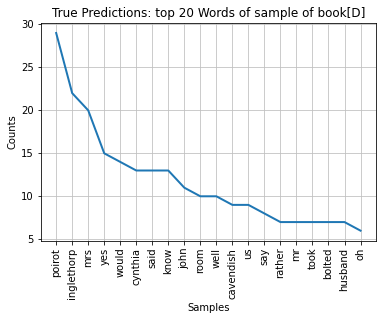

In [21]:
fdist = FreqDist(nltk.word_tokenize(true))
fdist.plot(20,cumulative=False,title='True Predictions: top 20 Words of sample of book[D]')
plt.show()

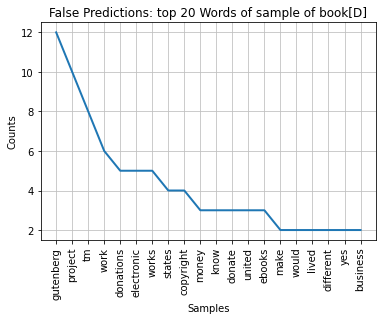

In [22]:
fdist = FreqDist(nltk.word_tokenize(false))
fdist.plot(20,cumulative=False,title='False Predictions: top 20 Words of sample of book[D]')
plt.show()

# Dist Plots of True Preds vs False Preds of book E

In [23]:
true = ''
for txt in df_test.text[(df_test.res == True) & (df_test.true == 'E')]:
    true += ' '+ txt

false = ''
for txt in df_test.text[(df_test.res == False) & (df_test.true == 'E')]:
    false += ' '+txt

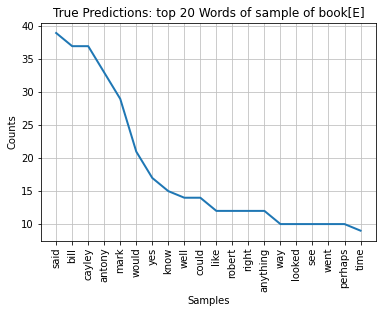

In [24]:
fdist = FreqDist(nltk.word_tokenize(true))
fdist.plot(20,cumulative=False,title='True Predictions: top 20 Words of sample of book[E]')
plt.show()

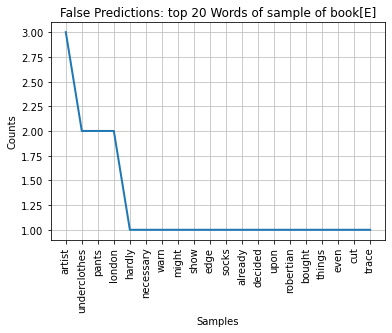

In [25]:
fdist = FreqDist(nltk.word_tokenize(false))
fdist.plot(20,cumulative=False,title='False Predictions: top 20 Words of sample of book[E]')
plt.show()